# Implementing **PCA from scratch** for **ECG signals** dataset

# Importing libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# Loading and checking data

In [28]:
df = pd.read_csv('/content/ECGCvdata.csv')
df.head(5)

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

# Removing **non-numeric** data

In [8]:
df_numeric = df.drop(columns = ['RECORD' , 'ECG_signal'])
df_numeric.columns.tolist()

['hbpermin',
 'Pseg',
 'PQseg',
 'QRSseg',
 'QRseg',
 'QTseg',
 'RSseg',
 'STseg',
 'Tseg',
 'PTseg',
 'ECGseg',
 'QRtoQSdur',
 'RStoQSdur',
 'RRmean',
 'PPmean',
 'PQdis',
 'PonQdis',
 'PRdis',
 'PonRdis',
 'PSdis',
 'PonSdis',
 'PTdis',
 'PonTdis',
 'PToffdis',
 'QRdis',
 'QSdis',
 'QTdis',
 'QToffdis',
 'RSdis',
 'RTdis',
 'RToffdis',
 'STdis',
 'SToffdis',
 'PonToffdis',
 'PonPQang',
 'PQRang',
 'QRSang',
 'RSTang',
 'STToffang',
 'RRTot',
 'NNTot',
 'SDRR',
 'IBIM',
 'IBISD',
 'SDSD',
 'RMSSD',
 'QRSarea',
 'QRSperi',
 'PQslope',
 'QRslope',
 'RSslope',
 'STslope',
 'NN50',
 'pNN50']

# Handling **misssing values**

In [10]:
df_numeric.fillna(df_numeric.mean() , inplace = True)
df_numeric.isnull().sum()

,0
hbpermin,0
Pseg,0
PQseg,0
QRSseg,0
QRseg,0
QTseg,0
RSseg,0
STseg,0
Tseg,0
PTseg,0


# **Normalizing** data

$$
X' = \frac{X - \mu}{\sigma}
$$

In [11]:
df_numeric.describe()

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,81.893980,0.060902,0.078099,0.048238,0.024437,0.141541,0.023800,0.093303,0.102714,0.219640,...,42.484060,199.417894,7.675047,23.915846,-0.071647,0.141737,-0.150496,0.041659,6.442500,8.112425
std,19.324351,0.009453,0.019897,0.034649,0.017501,0.029225,0.017175,0.013332,0.022594,0.046359,...,105.722123,112.292014,8.452832,25.070324,0.049705,0.043819,0.046431,0.026456,7.748445,10.325033
min,12.857143,0.021556,0.044526,0.000000,0.000000,0.098761,0.000000,0.052338,0.034936,0.150000,...,0.800624,61.711281,0.000000,0.000000,-0.219938,0.028660,-0.315525,0.008183,0.000000,0.000000
25%,67.563000,0.053943,0.060344,0.015101,0.007804,0.116016,0.007143,0.089423,0.090046,0.177343,...,4.060951,123.147741,0.000000,0.124186,-0.106660,0.141737,-0.150496,0.023853,1.000000,0.613497
50%,79.872000,0.060642,0.075184,0.044692,0.022676,0.137019,0.021965,0.097825,0.099210,0.215223,...,11.265829,183.603851,5.228299,19.904060,-0.058518,0.141737,-0.150496,0.034460,3.000000,3.680982
75%,96.000000,0.066849,0.095190,0.083032,0.041915,0.166314,0.041097,0.101200,0.112408,0.260269,...,44.785825,248.101035,14.355389,46.194325,-0.027685,0.141737,-0.150496,0.049778,10.000000,12.883436
max,160.500000,0.095317,0.145577,0.120160,0.065278,0.211111,0.058333,0.138444,0.198413,0.347324,...,1725.927603,1478.488460,33.131007,86.577082,-0.005427,0.270786,-0.027983,0.164633,37.000000,52.727273


In [14]:
mean = df_numeric.mean()
std = df_numeric.std()
df_numeric_scaled = (df_numeric - mean) / std
df_numeric_scaled.describe()

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,...,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,-4.973799e-16,5.802766e-16,-3.907985e-16,1.302662e-16,-1.065814e-16,-1.894781e-16,-4.144833e-17,3.789561e-16,-4.914587e-16,6.039613e-16,...,-2.368476e-17,-4.736952e-17,-7.105427e-17,7.105427e-17,3.079019e-16,-1.421085e-16,-5.210647e-16,-4.736952e-17,2.368476e-17,4.736952e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.572531e+00,-4.162272e+00,-1.687349e+00,-1.392183e+00,-1.396357e+00,-1.463845e+00,-1.385745e+00,-3.072702e+00,-2.999798e+00,-1.502182e+00,...,-3.942735e-01,-1.226326e+00,-9.079852e-01,-9.539504e-01,-2.983440e+00,-2.580528e+00,-3.554306e+00,-1.265335e+00,-8.314572e-01,-7.857045e-01
25%,-7.416022e-01,-7.361793e-01,-8.923377e-01,-9.563551e-01,-9.504507e-01,-8.733972e-01,-9.698601e-01,-2.910770e-01,-5.606604e-01,-9.123836e-01,...,-3.634349e-01,-6.792126e-01,-9.079852e-01,-9.489969e-01,-7.044372e-01,0.000000e+00,-5.977857e-16,-6.730197e-01,-7.023990e-01,-7.262861e-01
50%,-1.046338e-01,-2.750143e-02,-1.465133e-01,-1.023438e-01,-1.006361e-01,-1.547495e-01,-1.068443e-01,3.391598e-01,-1.550886e-01,-9.527833e-02,...,-2.952857e-01,-1.408296e-01,-2.894590e-01,-1.600213e-01,2.641325e-01,0.000000e+00,-5.977857e-16,-2.721148e-01,-4.442827e-01,-4.291941e-01
75%,7.299609e-01,6.291514e-01,8.589861e-01,1.004184e+00,9.986855e-01,8.476805e-01,1.007085e+00,5.923118e-01,4.290487e-01,8.763782e-01,...,2.177183e-02,4.335405e-01,7.903082e-01,8.886394e-01,8.844614e-01,0.000000e+00,-5.977857e-16,3.069054e-01,4.591244e-01,4.620819e-01
max,4.067719e+00,3.640639e+00,3.391394e+00,2.075740e+00,2.333623e+00,2.380535e+00,2.010650e+00,3.385922e+00,4.235560e+00,2.754218e+00,...,1.592329e+01,1.139057e+01,3.011530e+00,2.499419e+00,1.332252e+00,2.945042e+00,2.638629e+00,4.648330e+00,3.943695e+00,4.321037e+00


# Bartlett’s Test

$$
\chi^2 = -\left(n - 1 - \frac{2p + 5}{6}\right) \ln(\det(R))
$$

**Where:**
- \( $\chi^2 \$) = chi-squared test statistic (e.g., for sphericity)
- \( \$n \$) = sample size
- \( \$p \$) = number of variables
- \( \$R \$) = sample correlation matrix
- \( \$det(R) \$) = determinant of the correlation matrix

In [78]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


chi_square_value, p_value = calculate_bartlett_sphericity(df_numeric)


print(f"Bartlett’s Test: \n Chi-Square = {chi_square_value}, p-value = {p_value}")

if p_value < 0.05:
    print("\nFeatures are correlated Principal Component Analysis (PCA) is applicable")
else:
    print("The data is normally distributed.")


Bartlett’s Test: 
 Chi-Square = 572880.9618729713, p-value = 0.0

Features are correlated Principal Component Analysis (PCA) is applicable


# Kaiser-Meyer-Olkin Mesure

$$
\text{KMO} = \frac{\sum_{i \neq j} (r_{ij}^2 + p_{ij}^2)}{\sum_{i \neq j} r_{ij}^2}
$$

**Where:**
- \( $r_{ij} $\): Correlation coefficient between variables \( i \) and \( j \).
- \( $p_{ij} $\): Partial correlation coefficient between variables \( i \) and \( j \).
- \( $\sum_{i \neq j} $\): Summation over all pairs \( i \) and \( j \) where $( i \neq j $\).

In [81]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df_numeric)
print(f"KMO Score: {kmo_model}")

if kmo_model < 0.6:
    print("T\nhe data is not suitable for PCA")
else:
    print("\nThe data is suitable for PCA")

KMO Score: 0.8828558565076461

The data is suitable for PCA


# Covariance Matrix
$$
C = \frac{1}{n-1} X^T X
$$


In [17]:
cov_matric = np.cov(df_numeric_scaled.T)

cov_matric.shape

(54, 54)

# Computing **Eignevalues** and **Eigenvectors**

$$
Cv = \lambda v
$$

**Where:**
- \( $C$ \) = covariance matrix
- \( $v$ \) = eigenvector (principal component direction)
- \($\lambda$) = eigenvalue (importance of that direction)

In [18]:
Eigenvalues , Eigenvectors = np.linalg.eig(cov_matric)
Eigenvalues.shape , Eigenvectors.shape

((54,), (54, 54))

In [20]:
sorted_index = np.argsort(Eigenvalues[::-1])
Eignevalues_sorted = Eigenvalues[sorted_index]
Eignevectors_sorted = Eigenvectors[:,sorted_index]

In [24]:
print("The 5 most important Eigenvectors are : \n" , Eignevectors_sorted[:,:5])

The 5 most important Eigenvectors are : 
 [[-0.23661554  0.05600854 -0.03517262  0.00799306 -0.3096629 ]
 [-0.01311813  0.07616972  0.07919876 -0.18508263  0.13577772]
 [ 0.02587748  0.21924151  0.10535967  0.02666552  0.00258416]
 [ 0.0246724   0.24332929  0.10766413  0.06607863  0.00795706]
 [ 0.02436846  0.24320144  0.10752328  0.06968983  0.01079506]
 [ 0.01560949  0.18794699  0.12578877  0.05526159 -0.10718342]
 [ 0.02494338  0.2430777   0.10763869  0.06229524  0.00505274]
 [-0.02990488 -0.22040469 -0.00407496 -0.05059701 -0.25563242]
 [-0.089907   -0.14960231 -0.00258226 -0.14606045 -0.22803474]
 [ 0.02094643  0.2125763   0.12451543  0.04628101 -0.06645849]
 [-0.00482001  0.18358406  0.12883082 -0.03455082 -0.10771972]
 [ 0.19258652  0.14667576 -0.13148113 -0.17285925 -0.12601191]
 [ 0.19378779  0.14553259 -0.13110379 -0.17528966 -0.13255333]
 [ 0.22206415 -0.14493233  0.12723599 -0.05443196  0.16490015]
 [ 0.22180897 -0.14492439  0.1272721  -0.05473428  0.16495999]
 [-0.00718447

# Selcting Top K **Principal Components**

$$
Z = XW
$$

**Where:**
- \( $Z$ \) = transformed data
- \( $X$ \) = standardized data
- \( $W$ \) = matrix of top \( k \) eigenvectors

In [25]:
k = 3 #for visualization
top_eigenvectors = Eignevectors_sorted[:,:k]
top_eigenvectors.shape

(54, 3)

In [46]:
pca_df = np.dot(df_numeric_scaled , top_eigenvectors)
pca_df.shape

(1200, 3)

# Visualizing the **PCA Results**

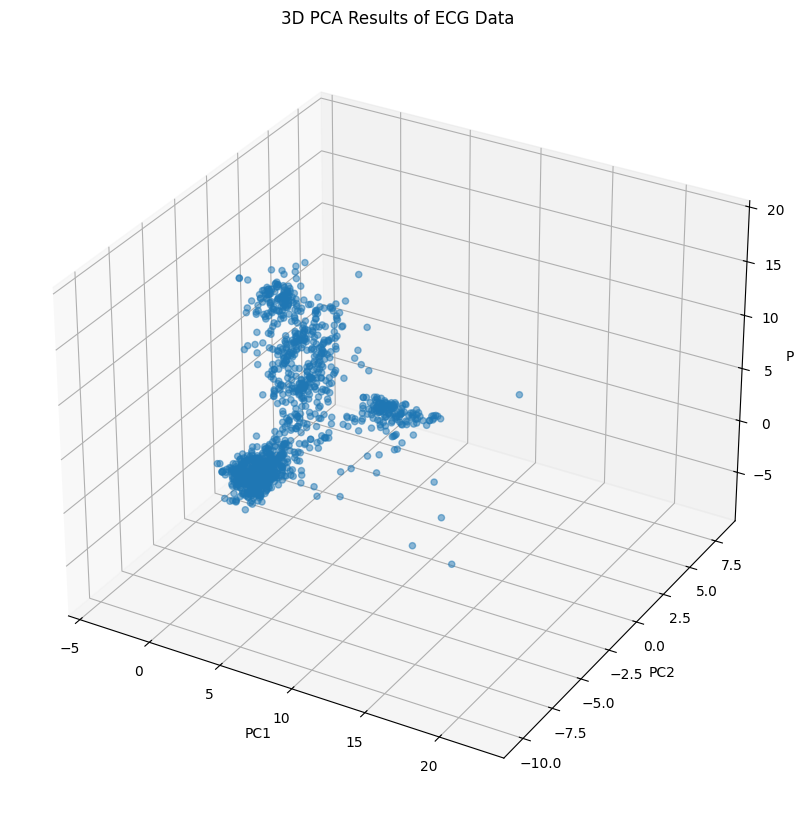

In [58]:
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111 , projection ='3d')

ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('3D PCA Results of ECG Data')
plt.show()


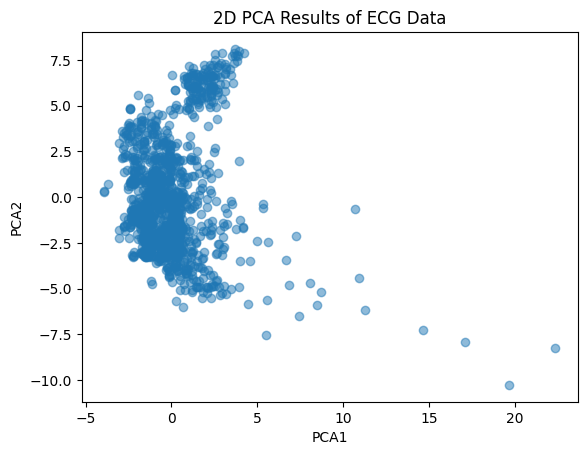

In [63]:
k = 2
top_eigenvectors = Eignevectors_sorted[:,:k]
pca_df = np.dot(df_numeric_scaled , top_eigenvectors)

plt.scatter(pca_df[:, 0], pca_df[:, 1], alpha=0.5)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D PCA Results of ECG Data")
plt.show()


# Explained Variance

$$
\text{Explained Variance} = \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^d \lambda_i}
$$

**Where:**

- \( $k$ \) = number of selected principal components
- \( $\lambda_i$ \) = eigenvalues
- \( $d$ \) = total number of eigenvalues (dimensions)


In [48]:
explained_variance = Eigenvalues[:k]/np.sum(Eigenvalues)
print(explained_variance)
print("Explained Variance by first 3 Principal Components :" , np.sum(explained_variance))

[0.51316785 0.18992537 0.07979023]
Explained Variance by first 3 Principal Components : 0.7828834477312517


# Compare with Scikit-learn

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(df_numeric_scaled)

print("Sklearn PCA variance explained:", np.sum(pca.explained_variance_ratio_))

Sklearn PCA variance explained: 0.7828834477312517


# PCA Clustering Plot

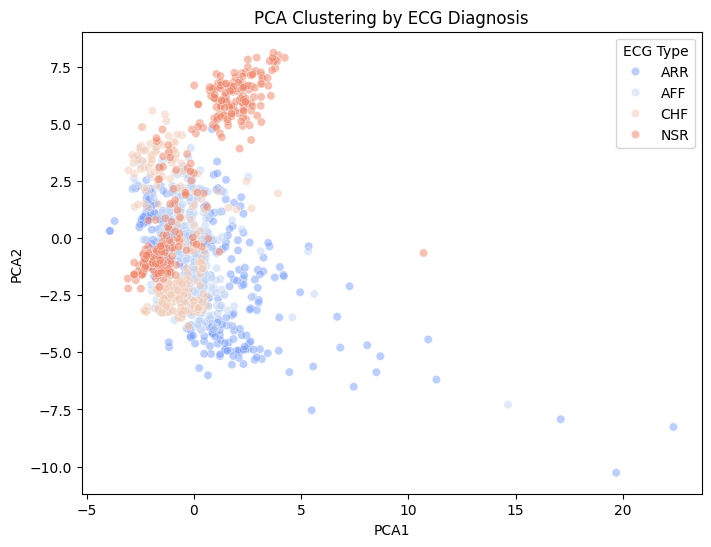

In [66]:

labels = df["ECG_signal"]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=labels, alpha=0.5, palette="coolwarm")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Clustering by ECG Diagnosis")
plt.legend(title="ECG Type")
plt.show()


# Scree Plot for optimal number of principal components

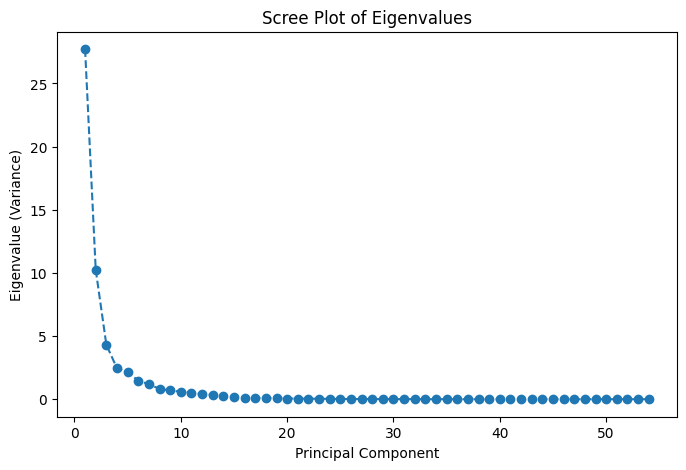

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(Eigenvalues) + 1), Eigenvalues, marker="o", linestyle="--")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue (Variance)")
plt.title("Scree Plot of Eigenvalues")
plt.show()

# Cumulative Explained Variance

$$
\text{Cumulative Variance}(k) = \frac{\sum_{i=1}^k \lambda_i}{\sum_{j=1}^n \lambda_j}
$$

**Where:**
- \( $\lambda_i \$) = eigenvalues
- \( k \) = number of selected principal components
- \( n \) = total number of eigenvalues (dimensions)

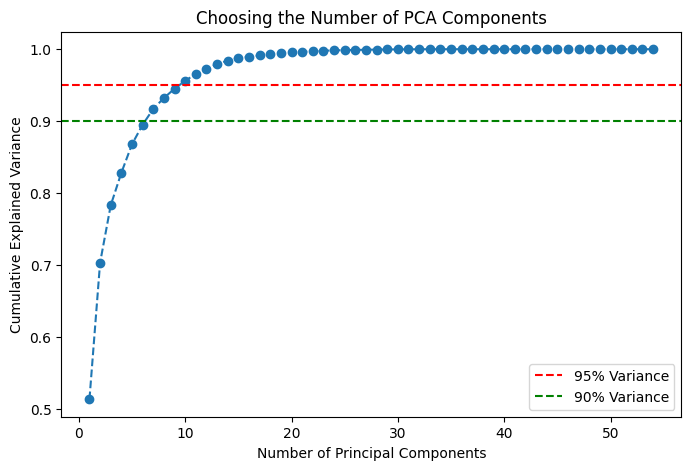

In [72]:
cumulative_variance = np.cumsum(Eigenvalues) / np.sum(Eigenvalues)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", linestyle="--")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance")
plt.axhline(y=0.90, color="g", linestyle="--", label="90% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.legend()
plt.show()